In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


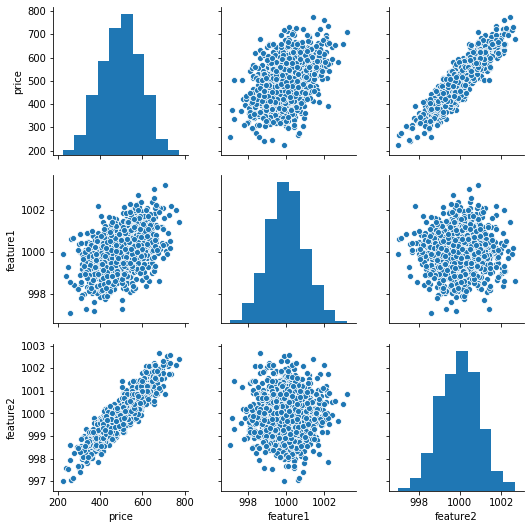

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[["feature1","feature2"]].values

In [6]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [7]:
y = df["price"].values

In [8]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X ,y ,test_size = 0.3,random_state = 42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential([
    Dense(4,activation="relu"),
    Dense(2,activation="relu"),
    Dense(1)])

In [29]:
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))
model.compile(optimizer = "rmsprop",loss = "mse")

In [30]:
model.fit(x = X_train, y= y_train,epochs = 250,verbose = 1)

s: 240573.0211
Epoch 29/250
700/700 [==============================] - 0s 56us/sample - loss: 239135.6059
Epoch 30/250
700/700 [==============================] - 0s 66us/sample - loss: 237593.5148
Epoch 31/250
700/700 [==============================] - 0s 61us/sample - loss: 235964.7659
Epoch 32/250
700/700 [==============================] - 0s 62us/sample - loss: 234239.9984
Epoch 33/250
700/700 [==============================] - 0s 71us/sample - loss: 232417.5829
Epoch 34/250
700/700 [==============================] - 0s 78us/sample - loss: 230493.9743
Epoch 35/250
700/700 [==============================] - 0s 107us/sample - loss: 228463.2387
Epoch 36/250
700/700 [==============================] - 0s 63us/sample - loss: 226305.5358
Epoch 37/250
700/700 [==============================] - 0s 55us/sample - loss: 224049.9455
Epoch 38/250
700/700 [==============================] - 0s 54us/sample - loss: 221682.5479
Epoch 39/250
700/700 [==============================] - 0s 56us/sample - l

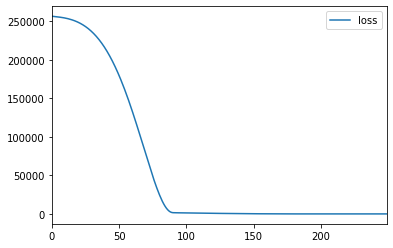

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [32]:
model.evaluate(x=X_test ,y=y_test,verbose = 0)

26.586507466634114

In [ ]:
pred = model.predict(X_test)